*   Author: Dilina Chathuraka Perera
*   Student who contributed to the code peer review: Neth Botheju
*   Date of the review: 14/03/2025


**Classification Modelling & Hyperparameters Tuning.**




*   Mounting the google drive



In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   Data manipulation and real-world data analysis in Python
*   From tutorial 1&2 (Week 1), Page 12

In [ ]:
#Importing pandas library
import pandas as pd

#Loading data into a DataFramed
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification_data.csv')


*   Print the rows and columns of the dataset
*   From tutorial 1&2 (week 1), page 13





In [ ]:
#displays the first five rows
df.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Estrogen_Status,Progesterone_Status,A_Stage,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,Mortality_Status
0,0.974359,0.000000,0.383333,0.000000,1.0,1.0,1.0,0.000000,0.0,0.00,0.333333,0.666667,Alive
1,0.512821,0.190476,0.216667,0.088889,1.0,1.0,1.0,0.333333,0.5,0.50,0.000000,0.333333,Alive
2,0.717949,0.457143,0.216667,0.133333,1.0,1.0,1.0,0.666667,1.0,1.00,0.000000,0.333333,Alive
3,0.717949,0.028571,0.016667,0.000000,1.0,1.0,1.0,0.000000,0.0,0.00,0.333333,0.666667,Alive
4,0.435897,0.247619,0.033333,0.000000,1.0,1.0,1.0,0.333333,0.0,0.25,0.333333,0.666667,Alive




*   Prints the summary of the data set that includes the data types of the each columns
*   From tutorial 1&2 (week 1), page 14



In [ ]:
# Use a method to explore the data types for all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4020 non-null   float64
 1   Tumor_Size              4020 non-null   float64
 2   Regional_Node_Examined  4020 non-null   float64
 3   Reginol_Node_Positive   4020 non-null   float64
 4   Estrogen_Status         4020 non-null   float64
 5   Progesterone_Status     4020 non-null   float64
 6   A_Stage                 4020 non-null   float64
 7   T_Stage                 4020 non-null   float64
 8   N_Stage                 4020 non-null   float64
 9   6th_Stage               4020 non-null   float64
 10  Differentiated          4020 non-null   float64
 11  Grade                   4020 non-null   float64
 12  Mortality_Status        4020 non-null   object 
dtypes: float64(12), object(1)
memory usage: 408.4+ KB




*   Define the dataset input feature X and y
*   From tutorial 3 (week 3), page 5



In [ ]:
#input features 'x' & output features 'y'
X = df[['Age','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Estrogen_Status','Progesterone_Status','A_Stage','T_Stage','N_Stage','6th_Stage','Differentiated','Grade']]#input features
y = df[['Mortality_Status']]#output features



*   Partition the data into a train set and a test set
*   From tutorial 3 (week 3), page 5



In [ ]:
#partition the data set into a train set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.2)



*   Check the size of the whole data and the size of training and test sets using the shape function.
*   From tutorial 3 (week 3), page 5



In [ ]:
#check the size of the whole 'X' data and the size of training and test sets using the shape function.
print('Whole Data shape', df.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (4020, 13)
X_train shape (3216, 12)
X_test shape (804, 12)


In [ ]:
#check the size of the whole 'y' data and the size of training and test sets using the shape function.
print('Whole Data shape', df.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

Whole Data shape (4020, 13)
y_train shape (3216, 1)
y_test shape (804, 1)




*   Prints the summary of the data set that includes the data types of the each columns
*   From tutorial 1&2 (week 1), page 14



In [ ]:
# Use a method to explore the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4020 non-null   float64
 1   Tumor_Size              4020 non-null   float64
 2   Regional_Node_Examined  4020 non-null   float64
 3   Reginol_Node_Positive   4020 non-null   float64
 4   Estrogen_Status         4020 non-null   float64
 5   Progesterone_Status     4020 non-null   float64
 6   A_Stage                 4020 non-null   float64
 7   T_Stage                 4020 non-null   float64
 8   N_Stage                 4020 non-null   float64
 9   6th_Stage               4020 non-null   float64
 10  Differentiated          4020 non-null   float64
 11  Grade                   4020 non-null   float64
 12  Mortality_Status        4020 non-null   object 
dtypes: float64(12), object(1)
memory usage: 408.4+ KB


**Logistic Regression Classifier.**



*   Binary Logistic Regression: The target variable has only two possible outcomes, Dead or Alive.
*   From tutorial 3 (week 3), page 7




In [ ]:
#using standardization to scale the input features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and then transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



*   Import the Logistic Regression module and create a Logistic
Regression classifier object using the LogisticRegression() function.
*  From tutorial 3 (week 3), page 8



In [ ]:
# import the class Instantiate the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# declares Logistic Regression modelling algorithm
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()



*   To view the predicted values for the train dataset, simply view the array of values created by
applying the predict() function
*   From tutorial (week 3), page 9



In [ ]:
# make the relevant predictions
y_pred_train=logreg.predict(X_train)

In [ ]:
#To see the predicted values
y_pred_train

array(['Alive', 'Alive', 'Alive', ..., 'Alive', 'Alive', 'Alive'],
      dtype=object)



*   Make the visual comparison
*   From tutorial 3 (week 3), page 9



In [ ]:
# Creating the comparison DataFrame
# Convert y_train and y_pred_train to 1D arrays using ravel()
y_train_flat = y_train.values.ravel()
y_pred_flat = y_pred_train.ravel()
comparison_df = pd.DataFrame({'Actual': y_train_flat, 'Predicted': y_pred_flat})

# Save to Google Drive
file_path = '/content/drive/MyDrive/Diagnoses_Comparison_df.csv'
comparison_df.to_csv(file_path, index=False)

# Display the DataFrame
comparison_df.head(10)

,Actual,Predicted
0,Alive,Alive
1,Dead,Alive
2,Alive,Alive
3,Alive,Alive
4,Alive,Alive
5,Dead,Alive
6,Alive,Alive
7,Alive,Alive
8,Dead,Alive
9,Alive,Alive




*   View all the predictions with truncation view
*   From tutorial 3 (week 3), page 9



In [ ]:
#scale the view to 200 instances
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)



*   Import the Logistic Regression module and create a Logistic
Regression classifier object using the LogisticRegression() function.
*  From tutorial 3 (week 3), page 8



In [ ]:
# to make the relevant predictions using test set
y_pred_logreg=logreg.predict(X_test)



*   Make the visual comparison
*   From tutorial 3 (week 3), page 9



In [ ]:
# to present such a comparison in a data frame
comparison_df=pd.DataFrame({'Actual' : y_test['Mortality_Status'],  'Predicted' : y_pred_logreg})

comparison_df

,Actual,Predicted
2981,Alive,Alive
1204,Alive,Alive
2720,Alive,Alive
1954,Alive,Alive
1226,Alive,Alive
...,...,...
1964,Dead,Alive
2525,Alive,Alive
3711,Alive,Alive
3930,Alive,Alive




*   To calculate the module accuracy, apply the accuracy_
score
function
*   From tutorial 3 (week 3), page 10



In [ ]:
# initiates the required library and function, then calculates and present the accuracy score only.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.8526119402985075




*   To calculate the module accuracy, apply the accuracy_
score
function
*   From tutorial 3 (week 3), page 10



In [ ]:
# initiates the required library and function, then calculates and presents the accuracy score only of the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_logreg)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8631840796019901




*   Model Evaluation using confusion matrix. The confusion
_
matrix module is imported from the metrics
package in the sklearn library and is the ConfusionMatrixDisplay
*   From tutorial 3 (week 3), page 10



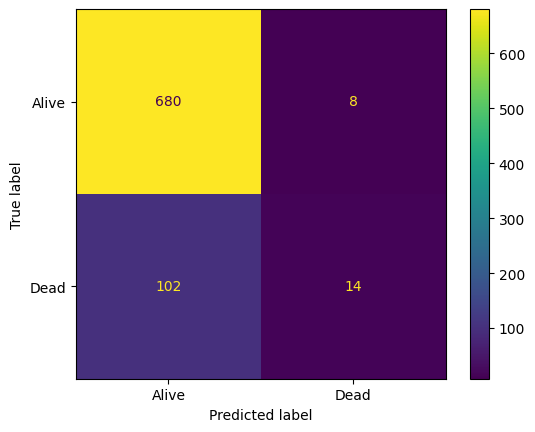

In [ ]:
# initiates the required library and function, then calculates and presents your desired confusion matrix only.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
disp.plot()



*   The classification metrics report
*   From tutorial 3 (week 3), page 11



In [ ]:
# initiates the required library and function for the report the display this report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

       Alive       0.87      0.99      0.93       688
        Dead       0.64      0.12      0.20       116

    accuracy                           0.86       804
   macro avg       0.75      0.55      0.56       804
weighted avg       0.84      0.86      0.82       804





*   The Receiver Operating Characteristic(ROC) curve is a graphical classification metric plot of the
true positive rate against the false positive rate.
*   From tutorial 3 (week 3), page 11



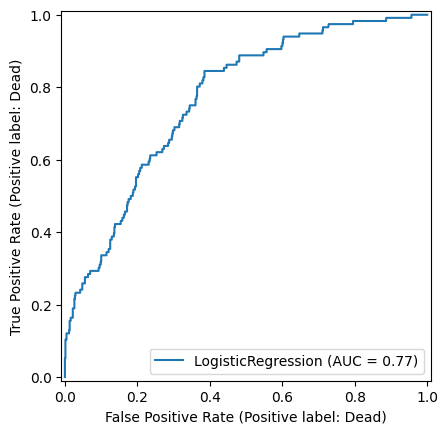

In [ ]:
# initiates the required library and function, then display this AUC-ROC.
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

**Building the k-Nearest-Neighbours (k-NN) Model with Scikit-learn**



*   Create a new k-NN classifier and set ‘n_neighbors’ to 9
*   From tutorial 3 (week 3), page 7



In [ ]:
#import the library and function to use the KNN modelling algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)

#Fit the classifier to the data
knn.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)



*   Testing the kNN model
*   From tutorial 3 (week 3), page 7



In [ ]:
#Perform predictions on the test data
y_pred_knn = knn.predict(X_test)




*   Perform predictions on the test data
*   From tutorial 3 (week 3), page 7



In [ ]:
import pandas as pd

# Create the DataFrame
# Extract the 'Mortality_Status' column from y_test as a 1D array
# y_test['Mortality_Status'] is used instead of y_test to provide a 1D array, which is expected by pandas DataFrame.
# Previously, y_test was a 2D DataFrame.
comparison_df = pd.DataFrame({'Actual': y_test['Mortality_Status'], 'Predicted': y_pred_knn})

# Display the comparison DataFrame
comparison_df

,Actual,Predicted
2981,Alive,Alive
1204,Alive,Alive
2720,Alive,Alive
1954,Alive,Alive
1226,Alive,Alive
...,...,...
1964,Dead,Alive
2525,Alive,Alive
3711,Alive,Alive
3930,Alive,Alive




*   To calculate the module accuracy, apply the accuracy_
score
function
*   From tutorial 3 (week 3), page 10



In [ ]:
#calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8507462686567164



*   The classification metrics report
*   From tutorial 3 (week 3), page 11

In [ ]:
# Generates and prints a classification report to evaluate the performance of the KNN model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))  # Displays precision, recall, f1-score, and support for KNN predictions


              precision    recall  f1-score   support

       Alive       0.87      0.97      0.92       688
        Dead       0.45      0.16      0.24       116

    accuracy                           0.85       804
   macro avg       0.66      0.57      0.58       804
weighted avg       0.81      0.85      0.82       804





*   Model Evaluation using confusion matrix. The confusion
_
matrix module is imported from the metrics
package in the sklearn library and is the ConfusionMatrixDisplay
*   From tutorial 3 (week 3), page 10



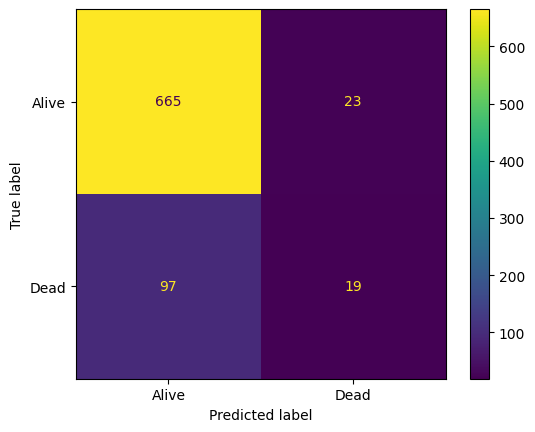

In [ ]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm = confusion_matrix(y_test, y_pred_knn, labels = knn.classes_)

#Plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot()



*   The Receiver Operating Characteristic(ROC) curve is a graphical classification metric plot of the
true positive rate against the false positive rate.
*   From tutorial 3 (week 3), page 11



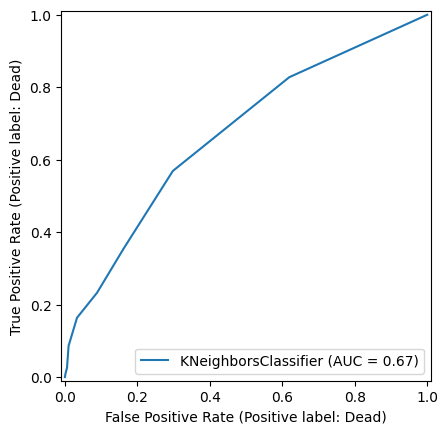

In [ ]:
# Plots the ROC curve to evaluate the KNN model's ability to distinguish between normal and intrusion traffic
from sklearn.metrics import RocCurveDisplay

knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)  # Displays the ROC curve for the KNN model


**Improving the kNN model’s test results with finding a different k value**



*   Create a loop to create multiple kNN models with different values of k
*   From tutorial 3 (week 3), page 9



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

The lowest average error is: 0.13432835820895522
This error is achieved with k = 38


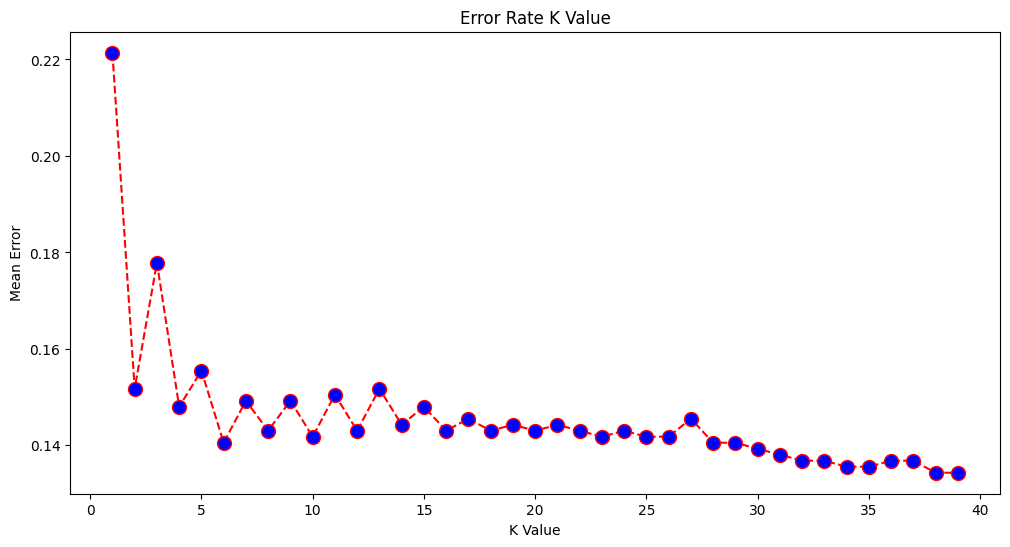

In [ ]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    # Accessing the 'Mortality_Status' column of y_test as a 1D array for comparison
    error.append(np.mean(pred_i != y_test['Mortality_Status'].values)) # Changed line
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

print(f"The lowest average error is: {min_error}")
print(f"This error is achieved with k = {best_k}")



*   The lowest average error is produced when k=38; therefore, rebuild the kNN model with k=38 and
observe any improvement in the evaluation results. Name the new model kNN1.
*   From tutorial 3 (week 3), page 9



In [ ]:
#rebuild the kNN model with k=38 and observe any improvement in the evaluation results.
#observe any improvement in the evaluation results.
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 38)
# Fit the classifier to the data
knn1.fit(X_train,y_train)
knn1 = KNeighborsClassifier(n_neighbors = 38)
# Fit the classifier to the data
knn1.fit(X_train,y_train)

#Perform predictions on the test data
y_pred=knn1.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




*   Model Evaluation using confusion matrix. The confusion
_
matrix module is imported from the metrics
package in the sklearn library and is the ConfusionMatrixDisplay
*   From tutorial 3 (week 3), page 10



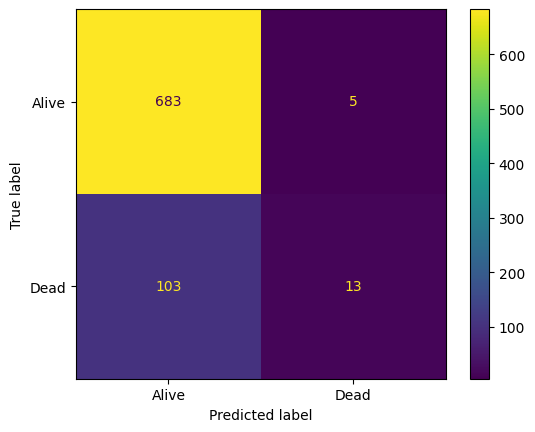

In [ ]:
# Generates and displays the confusion matrix for the K-Nearest Neighbors model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)  # Calculates the confusion matrix
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)  # Prepares the confusion matrix display
disp_knn1_cm.plot()  # Plots the confusion matrix for the KNN model



*   The classification metrics report
*   From tutorial 3 (week 3), page 11

In [ ]:
# Generates and prints the classification report, which includes metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # Displays the classification report for the test set predictions


              precision    recall  f1-score   support

       Alive       0.87      0.99      0.93       688
        Dead       0.72      0.11      0.19       116

    accuracy                           0.87       804
   macro avg       0.80      0.55      0.56       804
weighted avg       0.85      0.87      0.82       804





*   The Receiver Operating Characteristic(ROC) curve is a graphical classification metric plot of the
true positive rate against the false positive rate.
*   From tutorial 3 (week 3), page 11



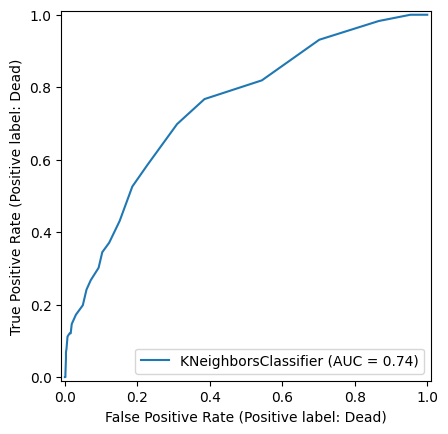

In [ ]:
# Displays the ROC curve for the K-Nearest Neighbors model and evaluates its performance
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn1, X_test, y_test)  # Generates the ROC curve for KNN model


**Building a Gaussian Naive Bayes Classifier Model with Scikit-learn**



*   Create a new naive bayes classifier
*   From tutorial 3 (week 3), page 15



In [ ]:
# Builds a Naive Bayes classification model using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()  # Initialize the Naive Bayes model
nb.fit(X_train, y_train)  # Train the model using the training data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()



*   Perform predictions on the test data
*   From tutorial 3 (week 3), page 7



In [ ]:
# Makes predictions on the test set using the trained Naive Bayes model
y_pred_nb = nb.predict(X_test)


In [ ]:
# Creates a DataFrame to compare the actual and predicted mortality status values
Comparison_df = pd.DataFrame({'Actual': y_test['Mortality_Status'], 'Predicted': y_pred_nb})

# Displays the comparison DataFrame
Comparison_df


,Actual,Predicted
2981,Alive,Alive
1204,Alive,Alive
2720,Alive,Alive
1954,Alive,Alive
1226,Alive,Alive
...,...,...
1964,Dead,Alive
2525,Alive,Alive
3711,Alive,Alive
3930,Alive,Alive




*   To calculate the module accuracy, apply the accuracy_
score
function
*   From tutorial 3 (week 3), page 10



In [ ]:
# Importing the necessary function for calculating accuracy score
from sklearn.metrics import accuracy_score

# Calculate the accuracy score by comparing true labels (y_test) and predicted labels (y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy score for the model's performance on the test set
print("The accuracy is: ", accuracy)


The accuracy is:  0.7786069651741293




*   Model Evaluation using confusion matrix. The confusion
_
matrix module is imported from the metrics
package in the sklearn library and is the ConfusionMatrixDisplay
*   From tutorial 3 (week 3), page 10



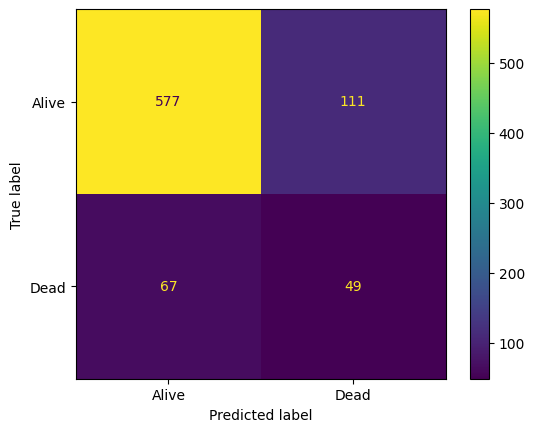

In [ ]:
# Importing the necessary functions for calculating and displaying the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix comparing true labels (y_test) with predicted labels (y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb, labels = nb.classes_)

# Create a ConfusionMatrixDisplay object to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = nb.classes_)

# Display the confusion matrix plot
disp.plot()



*   The classification metrics report
*   From tutorial 3 (week 3), page 11

In [ ]:
# Importing the necessary function to generate a classification report
from sklearn.metrics import classification_report

# Display the classification report comparing true labels (y_test) with predicted labels (y_pred_nb)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

       Alive       0.90      0.84      0.87       688
        Dead       0.31      0.42      0.36       116

    accuracy                           0.78       804
   macro avg       0.60      0.63      0.61       804
weighted avg       0.81      0.78      0.79       804





*   The Receiver Operating Characteristic(ROC) curve is a graphical classification metric plot of the
true positive rate against the false positive rate.
*   From tutorial 3 (week 3), page 11



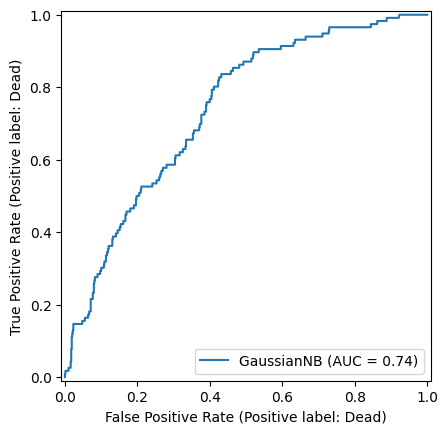

In [ ]:
# Importing the necessary function to display the ROC curve
from sklearn.metrics import RocCurveDisplay

# Display the ROC curve for the Naive Bayes model (nb) on the test data (X_test, y_test)
RocCurveDisplay.from_estimator(nb, X_test, y_test)




*   Improving the logistic regression performance with Hyperparameter Tuning
*   From tutorial 3 (week 3), page 11



In [ ]:
# Import GridSearchCV from sklearn.model_selection to tune hyperparameters
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for Logistic Regression to optimize
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}

# Apply Grid Search with 5-fold cross-validation to find the best hyperparameters for Logistic Regression
logreg_gscv = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)

# Train the Logistic Regression model on the training data while tuning the hyperparameters
logreg_gscv.fit(X_train, y_train)

# Retrieve and store the best hyperparameters found by GridSearchCV
best_params_logreg = logreg_gscv.best_params_


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam



*   Improving the knn neighbors performance with Hyperparameter Tuning
*   From tutorial 3 (week 3), page 11



In [ ]:
# Define a grid of hyperparameters to optimize for the k-Nearest Neighbors model
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Apply Grid Search with 5-fold cross-validation to find the best hyperparameters for the model
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Train the k-Nearest Neighbors model on the training data and perform hyperparameter tuning
knn_gscv.fit(X_train, y_train)

# Retrieve and store the best hyperparameters found by GridSearchCV
best_params_knn = knn_gscv.best_params_


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 



*   Improving the naive bayes performance with Hyperparameter Tuning
*   From tutorial 3 (week 3), page 11



In [ ]:
# Define a grid of hyperparameters to optimize for the Naive Bayes model (GaussianNB)
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Apply Grid Search with 5-fold cross-validation to find the best hyperparameters for the model
nb_gscv = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

# Train the Naive Bayes model on the training data and perform hyperparameter tuning
nb_gscv.fit(X_train, y_train)

# Retrieve and store the best hyperparameters found by GridSearchCV
best_params_nb = nb_gscv.best_params_


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam



*   Calculate the accuracy scores




In [ ]:
# Use the best model from GridSearchCV (Logistic Regression) to predict mortality status on the test data
y_pred_logreg = logreg_gscv.best_estimator_.predict(X_test)

# Calculate and display the accuracy score by comparing the predicted mortality status with the actual status
accuracy_score(y_test, y_pred_logreg)


0.8631840796019901

In [ ]:
# Use the best model from GridSearchCV to make predictions on the test data
y_pred_knn = knn_gscv.best_estimator_.predict(X_test)

# Calculate and display the accuracy score by comparing the predicted labels with the true labels
accuracy_score(y_test, y_pred_knn)


0.849502487562189

In [ ]:
# Use the best model from GridSearchCV to make predictions on the test data
y_pred_nb = nb_gscv.best_estimator_.predict(X_test)

# Calculate and display the accuracy score by comparing the predicted labels with the true labels
accuracy_score(y_test, y_pred_nb)


0.7786069651741293

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Train default Logistic Regression
logreg_default = LogisticRegression()
logreg_default.fit(X_train, y_train)

# Predictions
y_pred_default = logreg_default.predict(X_test)

# Confusion Matrix
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

# Performance Metrics (e.g., Precision, Recall, F1-Score)
report_default = classification_report(y_test, y_pred_default)


display(conf_matrix_default)
print(report_default)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[682,   6],
       [ 99,  17]])

              precision    recall  f1-score   support

       Alive       0.87      0.99      0.93       688
        Dead       0.74      0.15      0.24       116

    accuracy                           0.87       804
   macro avg       0.81      0.57      0.59       804
weighted avg       0.85      0.87      0.83       804



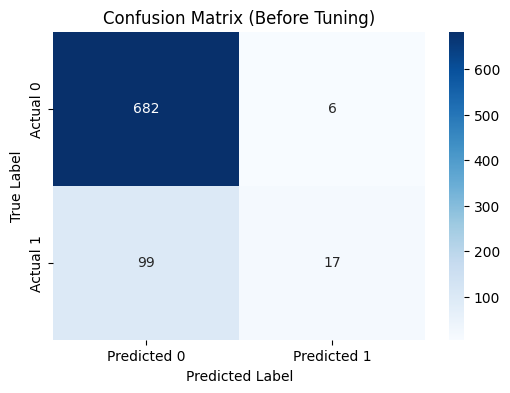

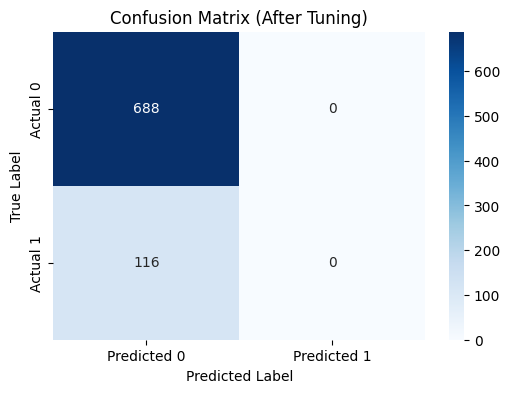

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# --- Before Tuning ---
y_pred_default = logreg_default.predict(X_test)
plot_confusion_matrix(y_test, y_pred_default, "Confusion Matrix (Before Tuning)")

# --- After Tuning ---
y_pred_tuned = logreg_gscv.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tuned, "Confusion Matrix (After Tuning)")